In [1]:
import modelo as m
import pandas as pd
import Bio.KEGG.REST as rkg
import Bio.KEGG.Enzyme as ex
import networkx as nx

In [2]:
eco = m.get_network("eco", opt="eco")

Retrieving data from KEGG PATHWAY database. Wed Mar 28 12:31:17 2018
Building graphs.


In [3]:
eco_nodes = list(eco.grafo.nodes())
eco_nodes.remove('undefined')
orf_queries = dict()
product_queries = []

for i in range(len(eco_nodes)):
    gene = rkg.kegg_get(eco_nodes[i])
    tmp = ex.read(gene)
    if eco_nodes[i].startswith("eco:"):
        orf_queries[eco_nodes[i]]=tmp.name[0]
        

In [4]:
nodes_eco = {v: k for k, v in orf_queries.items()}


In [5]:
nodes_eco

{'aas': 'eco:b2836',
 'accC': 'eco:b3256',
 'aceA': 'eco:b4015',
 'aceB': 'eco:b4014',
 'aceE': 'eco:b0114',
 'aceF': 'eco:b0115',
 'ackA': 'eco:b2296',
 'acnA': 'eco:b1276',
 'acnB': 'eco:b0118',
 'acpH': 'eco:b0404',
 'acpS': 'eco:b2563',
 'acpT': 'eco:b3475',
 'acrA': 'eco:b0463',
 'acrB': 'eco:b0462',
 'acrD': 'eco:b2470',
 'acs': 'eco:b4069',
 'acuI': 'eco:b3253',
 'add': 'eco:b1623',
 'adeD': 'eco:b3665',
 'adhE': 'eco:b1241',
 'adiA': 'eco:b4117',
 'adk': 'eco:b0474',
 'aer': 'eco:b3072',
 'afuC': 'eco:b0262',
 'agaD': 'eco:b3140',
 'agaI': 'eco:b3141',
 'agaV': 'eco:b3133',
 'alaA': 'eco:b2290',
 'alaS': 'eco:b2697',
 'aldA': 'eco:b1415',
 'aldB': 'eco:b3588',
 'allA': 'eco:b0505',
 'allB': 'eco:b0512',
 'allC': 'eco:b0516',
 'allD': 'eco:b0517',
 'allE': 'eco:b0515',
 'alr': 'eco:b4053',
 'alsE': 'eco:b4085',
 'alsK': 'eco:b4084',
 'amiB': 'eco:b4169',
 'ampC': 'eco:b4150',
 'ampG': 'eco:b0433',
 'ansB': 'eco:b2957',
 'aphA': 'eco:b4055',
 'appY': 'eco:b0564',
 'apt': 'eco:b04

In [6]:
table = pd.read_table("NetData.dat")
node2rem = []
for j in eco.grafo.nodes():
    if orf_queries.get(j,None) == None:
        node2rem.append(j)
eco.grafo.remove_nodes_from(node2rem)

In [7]:
in_d = nx.centrality.in_degree_centrality(eco.grafo)
out_d = nx.centrality.out_degree_centrality(eco.grafo)
e_cent = nx.eigenvector_centrality(eco.grafo)
clo_cent = nx.centrality.closeness_centrality(eco.grafo)
bet_cent = nx.centrality.betweenness_centrality(eco.grafo)


In [45]:
page = nx.pagerank(eco.grafo)
hits = nx.hits(eco.grafo)

In [68]:
aux = []
for i,j in zip(table["Feature/Product"], table["Class(1:essential 2:noessential)"]):
    tmp = nodes_eco.get(i,None)
    if tmp != None:
        aux.append([tmp,in_d[tmp],out_d[tmp],e_cent[tmp],clo_cent[tmp],bet_cent[tmp],page[tmp],hits[0][tmp],j])

# Pre processing

In [170]:
data = pd.DataFrame(aux, columns=["ec","in_degree","out_degree","eigenvector_centrality","closeness centrality","Betweenness centrality","pagerank","hits","class"])


In [77]:
import numpy as np
import sklearn
import pandas
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA


In [171]:
data.iloc[:,1:data.shape[1]-1]

,in_degree,out_degree,eigenvector_centrality,closeness centrality,Betweenness centrality,pagerank,hits
0,0.009956,0.007743,1.241306e-04,0.095086,1.383488e-03,0.002214,0.000008
1,0.007743,0.007743,3.977600e-05,0.089025,8.694868e-04,0.001939,0.000004
2,0.006637,0.007743,6.791015e-05,0.092838,3.402753e-03,0.002063,0.000008
3,0.000000,0.004425,2.640984e-27,0.000000,0.000000e+00,0.000252,0.000005
4,0.015487,0.015487,6.916455e-04,0.102431,3.578438e-03,0.002625,0.000074
5,0.004425,0.004425,6.393537e-05,0.089685,2.217415e-05,0.000873,0.000007
6,0.005531,0.002212,7.076659e-05,0.088698,4.221921e-04,0.001028,0.000006
7,0.012168,0.016593,3.485107e-04,0.102131,1.464687e-02,0.002449,0.000045
8,0.013274,0.011062,2.593119e-03,0.117042,1.413965e-02,0.002385,0.000305
9,0.015487,0.014381,4.130267e-03,0.117173,2.916749e-02,0.002783,0.000537


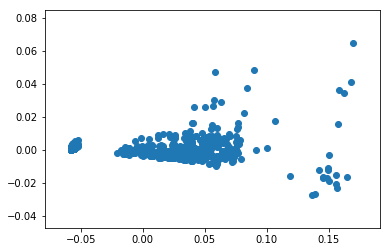

In [142]:
pca = PCA(n_components=3)
princComp = pca.fit_transform(data.iloc[:,1:data.shape[1]-1])

dfPCA = pandas.DataFrame(data = princComp)
plt.scatter(dfPCA[0],dfPCA[2])

In [150]:
from igraph import * 
from igraph.drawing import plot as pt
from pylab import *
from plotly.offline import *
import cufflinks as cf
from plotly.graph_objs import *
import pandas as pd   
import numpy as np
import plotly.tools as tls
import powerlaw
init_notebook_mode(connected=True)


In [168]:

pca = Scatter3d(x=dfPCA[0],
                  y=dfPCA[1],
                  z = dfPCA[2], 
                  showlegend=False,
                  name='pca0',
                  mode='markers',
                  marker=dict(color='yellow'))

data = [pca]
layout = Layout(title="Componentes")
fig = Figure(data=data, layout=layout)

iplot(fig,filename='jupyter/styled_bar')


In [141]:
print(list(data.columns.values)[1:-1])
for i in range(3):
    print(pca.components_[i])
    

['in_degree', 'out_degree', 'eigenvector_centrality', 'closeness centrality', 'Betweenness centrality', 'pagerank', 'hits']
[0.08759121 0.08040513 0.33023543 0.93366773 0.05408956 0.01235948
 0.04464854]
[ 0.06931262  0.06470637  0.9227886  -0.34788864  0.06269389  0.0026198
  0.12044152]
[ 0.33388665  0.44748896 -0.14602658 -0.06894749  0.80908288  0.05828302
  0.06468224]


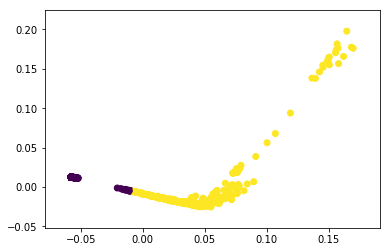

In [121]:
from sklearn.cluster import KMeans, AffinityPropagation
import pylab as pl

kmeans = KMeans(n_clusters=2, random_state=111, algorithm="elkan")
kmeans.fit(data.iloc[:,1:data.shape[1]-1])
pl.figure('K-means with 2 clusters')
pl.scatter(dfPCA[0],dfPCA[1], c=kmeans.labels_)
pl.show()


In [177]:
from sklearn.feature_selection import SelectKBest, chi2
chi2 = sklearn.feature_selection.chi2(data.iloc[:,1:data.shape[1]-1],data.iloc[:,-1:])

In [181]:
chi2[1]

array([0.98806883, 0.98092075, 0.67596861, 0.5639355 , 0.58873442,
       0.95970719, 0.88707926])

In [131]:
nx.write_gexf(eco.grafo, "filteredgraph.gefx")